# 02: Likelihood fits

## Calculations

In [1]:
from parscanning import GridScan
import SMEFT19
from SMEFT19.SMEFTglob import likelihood_fits
from SMEFT19.scenarios import scIV, scV, scVI, scXI
import warnings

### Scenario IV

In [2]:
SMEFT19.SMEFTglob.smelli.flavio.measurements.read_file('../../InputsILC/Input_scIV.yaml')
#We only have to recalculate the likelihood in the EWPT observables
SMEFT19.SMEFTglob.restart_smelli(include_likelihoods=('likelihood_ewpt.yaml',),
                                 add_measurements={'likelihood_ewpt.yaml':('ILC250',)})
xmin = -2.0
xmax = 2.0
ymin = -2.0
ymax = 2.0
xmargin = 0.02*(xmax-xmin)
ymargin = 0.02*(ymax-ymin)
GS = GridScan(likelihood_fits, [xmin-xmargin, ymin-ymargin], [xmax+xmargin, ymax+ymargin], 50)
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    GS.run_mp(4, scIV)
GS.save_csv('../../likelihood/likelihood_IV_ILC.dat')

### Scenario V

In [3]:
SMEFT19.SMEFTglob.smelli.flavio.measurements.read_file('../../InputsILC/Input_scV.yaml')
SMEFT19.SMEFTglob.restart_smelli(include_likelihoods=('likelihood_ewpt.yaml',),
                                 add_measurements={'likelihood_ewpt.yaml':('ILC250',)})
xmin = -1.0
xmax = 1.0
ymin = -2.0
ymax = 2.0
xmargin = 0.02*(xmax-xmin)
ymargin = 0.02*(ymax-ymin)
GS = GridScan(likelihood_fits, [xmin-xmargin, ymin-ymargin], [xmax+xmargin, ymax+ymargin], 50)
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    GS.run_mp(4, scV)
GS.save_csv('../../likelihood/likelihood_V_ILC.dat')

### Scenario VI

In [4]:
SMEFT19.SMEFTglob.smelli.flavio.measurements.read_file('../../InputsILC/Input_scVI.yaml')
SMEFT19.SMEFTglob.restart_smelli(include_likelihoods=('likelihood_ewpt.yaml',),
                                 add_measurements={'likelihood_ewpt.yaml':('ILC250',)})
xmin = -1.0
xmax = 1.0
ymin = -2.0
ymax = 2.0
xmargin = 0.02*(xmax-xmin)
ymargin = 0.02*(ymax-ymin)
GS = GridScan(likelihood_fits, [xmin-xmargin, ymin-ymargin], [xmax+xmargin, ymax+ymargin], 50)
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    GS.run_mp(4, scVI)
GS.save_csv('../../likelihood/likelihood_VI_ILC.dat')

### Scenario XI

In [5]:
SMEFT19.SMEFTglob.smelli.flavio.measurements.read_file('../../InputsILC/Input_scXI.yaml')
SMEFT19.SMEFTglob.restart_smelli(include_likelihoods=('likelihood_ewpt.yaml',),
                                 add_measurements={'likelihood_ewpt.yaml':('ILC250',)})
xmin = -1.0
xmax = 1.0
ymin = -2.0
ymax = 2.0
xmargin = 0.02*(xmax-xmin)
ymargin = 0.02*(ymax-ymin)
GS = GridScan(likelihood_fits, [xmin-xmargin, ymin-ymargin], [xmax+xmargin, ymax+ymargin], 50)
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    GS.run_mp(4, scXI)
GS.save_csv('../../likelihood/likelihood_XI_ILC.dat')

## Plotting

In [6]:
import numpy as np
import pandas as pd
from SMEFT19.plots import likelihood_plot
from collections import OrderedDict

In [7]:
def read_meshgrid(fnames, stepx=50, stepy=50):
    zdata_LHC = pd.read_csv(fnames[0], sep='\t')
    zdata_ILC = pd.read_csv(fnames[1], sep='\t')
    xcoords = np.linspace(zdata_LHC['x'].min(), zdata_LHC['x'].max(), stepx)
    ycoords = np.linspace(zdata_LHC['y'].min(), zdata_LHC['y'].max(), stepy)
    d = OrderedDict()
    fitcodes = {r'$R_{K^{(*)}}$':'likelihood_lfu_fcnc.yaml', r'$R_{D^{(*)}}$':'likelihood_rd_rds.yaml',
                'EW (LHC)':'likelihood_ewpt.yaml', 'eeWW':'likelihood_eeww.yaml', 'Global (LHC)':'global'}
    for k, v in zip(fitcodes.keys(), fitcodes.values()):
        z = np.array(zdata_LHC[v]).reshape(stepx, stepy)
        d[k] = z    
    d['EW (ILC)'] = np.array(zdata_ILC[fitcodes['EW (LHC)']]).reshape(stepx, stepy)
    d.move_to_end('Global (LHC)')
    d['Global (ILC)'] = d['Global (LHC)'] - d['EW (LHC)'] + d['EW (ILC)']
    d['EW (LHC)'] = d['EW (LHC)'] + d['eeWW']
    d['EW (ILC)'] = d['EW (ILC)'] + d['eeWW']
    d.pop('eeWW')
    return (xcoords, ycoords, d)

In [8]:
ILC_green = (0.462745,0.803922,0.149020)
ILC_brown = (0.745098,0.392157,0.000000)

### Plot Scenario IV

linewidths is ignored by contourf


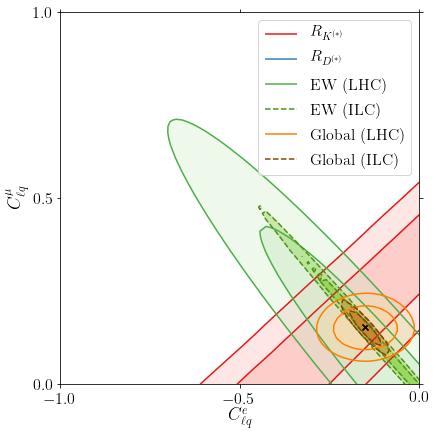

In [9]:
likelihood_plot(read_meshgrid(['../../likelihood/likelihood_IV.dat', '../../likelihood/likelihood_IV_ILC.dat']),
                -1.0, 0.0, 0.0, 1.0, [r'$C_{\ell q}^e$', r'$C_{\ell q}^\mu$'], locleg='upper right',
                colors=[0,1,2,ILC_green,4,ILC_brown], bf=[-0.1511,0.152], widths=[1.5,]*6,
                styles=['solid', 'solid', 'solid', 'dashed', 'solid', 'dashed'], fout='../../plots/scIV_ILC')

### Plot Scenario V

linewidths is ignored by contourf


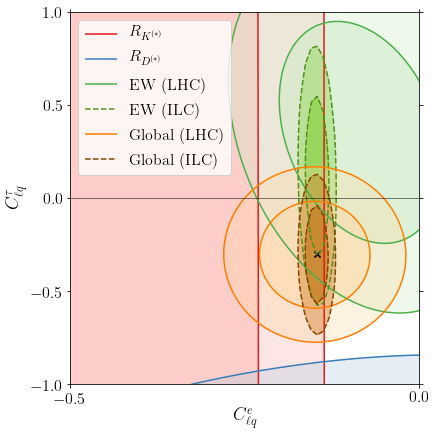

In [10]:
likelihood_plot(read_meshgrid(['../../likelihood/likelihood_V.dat', '../../likelihood/likelihood_V_ILC.dat']),
                -0.5, 0.0, -1.0, 1.0, [r'$C_{\ell q}^e$', r'$C_{\ell q}^\tau$'], locleg='upper left',
                colors=[0,1,2,ILC_green,4,ILC_brown], bf=[-0.1467,-0.2998], widths=[1.5,]*6,
                styles=['solid', 'solid', 'solid', 'dashed', 'solid', 'dashed'], fout='../../plots/scV_ILC')

### Plot Scenario VI

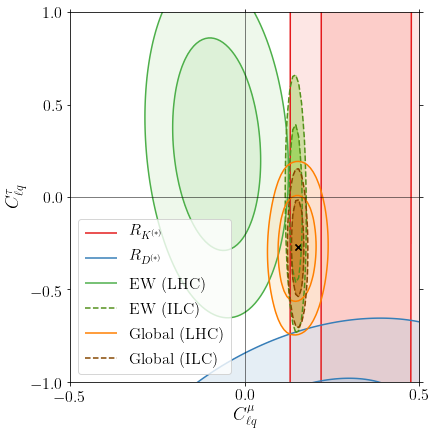

In [11]:
likelihood_plot(read_meshgrid(['../../likelihood/likelihood_VI.dat', '../../likelihood/likelihood_VI_ILC.dat']),
                -0.5, 0.5, -1.0, 1.0, [r'$C_{\ell q}^\mu$', r'$C_{\ell q}^\tau$'], locleg='lower left',
                colors=[0,1,2,ILC_green,4,ILC_brown], bf=[0.152,-0.271], widths=[1.5,]*6,
                styles=['solid', 'solid', 'solid', 'dashed', 'solid', 'dashed'], fout='../../plots/scVI_ILC')

### Plot Scenario XI

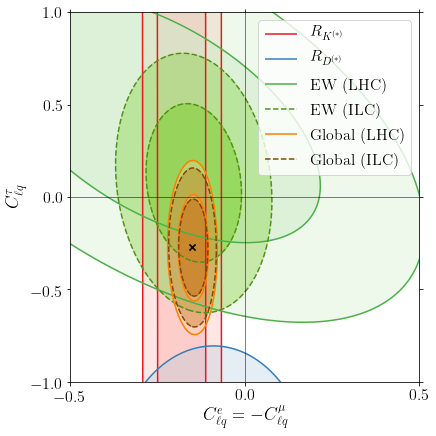

In [12]:
likelihood_plot(read_meshgrid(['../../likelihood/likelihood_XI.dat', '../../likelihood/likelihood_XI_ILC.dat']),
                -0.5, 0.5, -1.0, 1.0, [r'$C_{\ell q}^e = -C_{\ell q}^\mu$', r'$C_{\ell q}^\tau$'],
                locleg='upper right',
                colors=[0,1,2,ILC_green,4,ILC_brown], bf=[-0.14988535, -0.26939863], widths=[1.5,]*6,
                styles=['solid', 'solid', 'solid', 'dashed', 'solid', 'dashed'], fout='../../plots/scXI_ILC')